In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings('ignore')

In [2]:
heart = pd.read_csv('heart.csv')

In [3]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
heart.shape

(918, 12)

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
heart['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [9]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

EDA

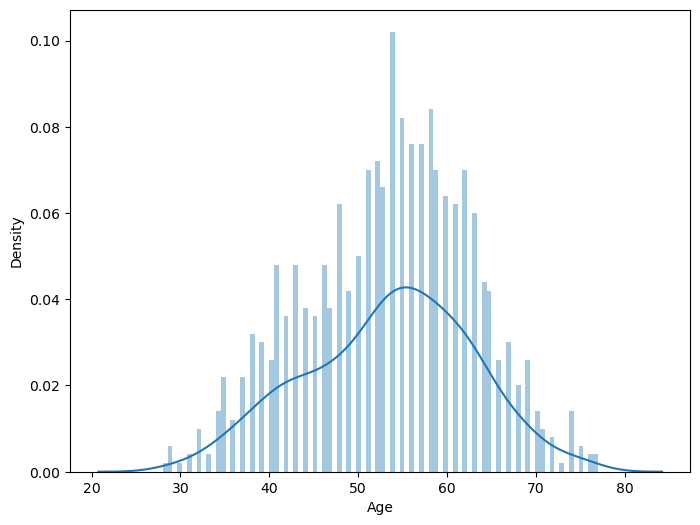

In [11]:
plt.figure(figsize=(8,6))
sns.distplot(heart['Age'],bins=90)
plt.show()

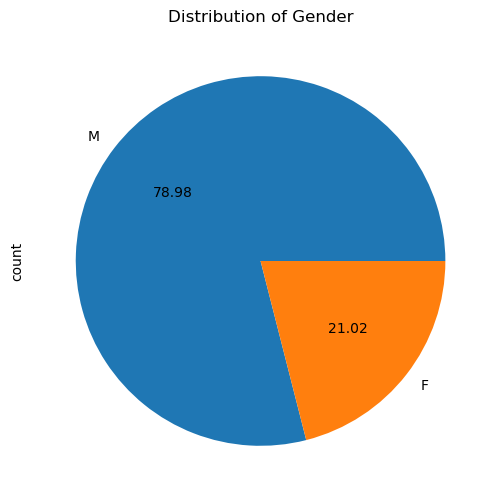

In [12]:
plt.figure(figsize=(8,6))
heart['Sex'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Distribution of Gender')
plt.show()

In [13]:
target = heart['HeartDisease']

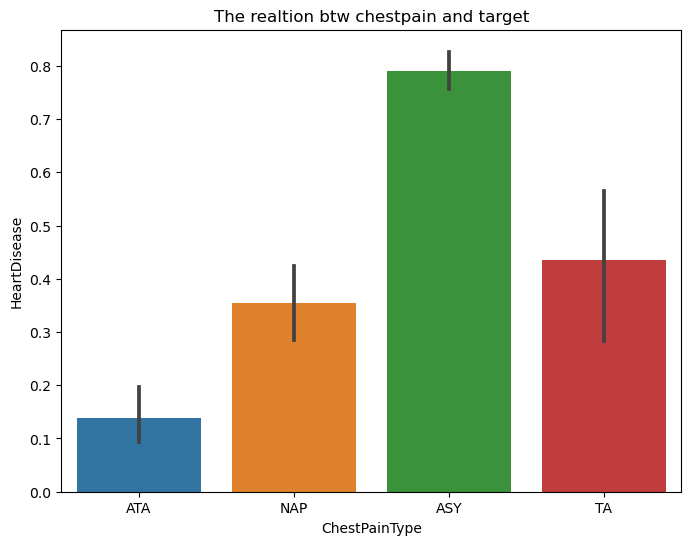

In [14]:
plt.figure(figsize=(8,6))
sns.barplot(x=heart['ChestPainType'],y=target,data=heart)
plt.title('The realtion btw chestpain and target')
plt.show()

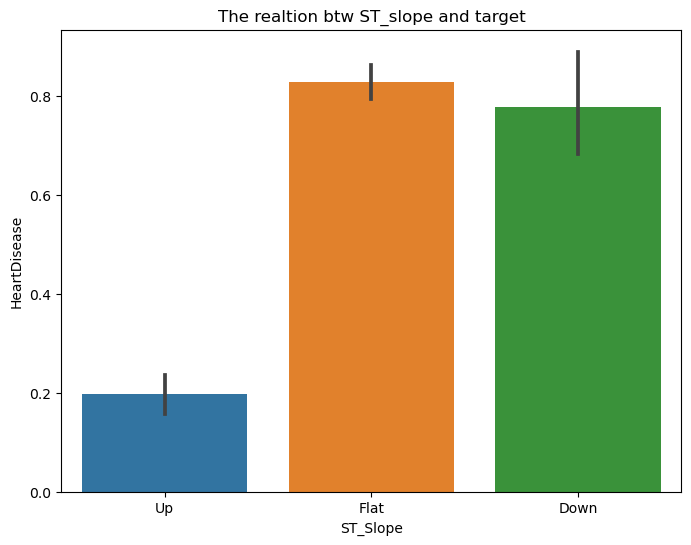

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(x=heart['ST_Slope'],y=target,data=heart)
plt.title('The realtion btw ST_slope and target')
plt.show()

In [16]:
heart[heart['ChestPainType']=='ATA'].shape

(173, 12)

In [17]:
heart[heart['ST_Slope']=='Up'].shape

(395, 12)

In [18]:
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df = pd.get_dummies(heart, columns=categorical_columns, drop_first=True,dtype=int)

In [19]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [20]:
x=df.drop(['HeartDisease'],axis=1)
y=df['HeartDisease']

In [21]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x= pd.DataFrame(sc.fit_transform(x))

In [22]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


SelectKBest-Method

In [23]:
col=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14']

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [25]:
best_feature =SelectKBest(score_func=chi2,k=10).fit(x,y)

In [26]:
scores=pd.DataFrame(best_feature.scores_)
columns=pd.DataFrame(col)

In [27]:
feature_score = pd.concat([columns,scores],axis=1)
feature_score.columns=['Features','Scores']

<Figure size 1000x800 with 0 Axes>

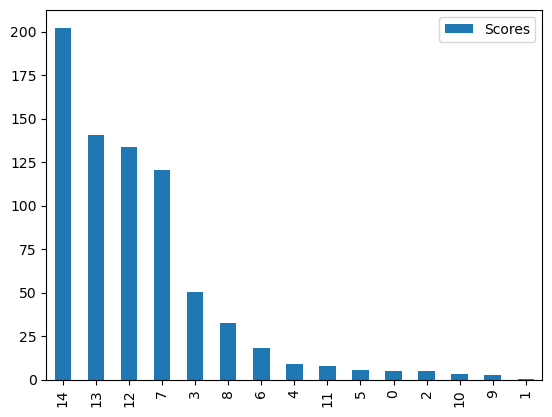

In [28]:
plt.figure(figsize=(10,8))
feature_score.nlargest(15,'Scores').plot(kind="bar")
plt.show()

In [29]:
features = x.drop(columns=[1,9],axis=1)

In [30]:
features.head()

,0,2,3,4,5,6,7,8,10,11,12,13,14
0,0.244898,0.479270,0.0,0.788732,0.295455,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.298507,0.0,0.676056,0.409091,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.469320,0.0,0.267606,0.295455,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.408163,0.354892,0.0,0.338028,0.465909,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.530612,0.323383,0.0,0.436620,0.295455,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [31]:
features.shape

(918, 13)

In [32]:
y.shape

(918,)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(features,y,test_size=0.3,random_state=42)

In [34]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(642, 13) (276, 13)
(642,) (276,)


Model Planing

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
para = {"max_iter":[100,200,300]}
lr = LogisticRegression()
lr_rs = RandomizedSearchCV(lr,cv=5,param_distributions=para)
lr_rs.fit(x_train,y_train)
y_pred= lr_rs.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score
lr_acc = accuracy_score(y_true=y_test,y_pred=y_pred)
print("Accuracy score using Logistic Regression :",lr_acc)

Accuracy score using Logistic Regression : 0.8731884057971014


By SVM

In [38]:
from sklearn.svm import SVC

In [39]:
param ={
    'kernel':['linear','poly','sigmoid'],
    'C':[100,50]
}
svc=SVC()
svm_rs = RandomizedSearchCV(svc,param_distributions=param,random_state=42,cv=3)
svm_rs.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [40]:
svc_pred = svm_rs.predict(x_test)
svc_acc=accuracy_score(y_true=y_test,y_pred=svc_pred)
print("Accuracy of svm",svc_acc)

Accuracy of svm 0.8695652173913043
